In [231]:
import pyvista as pv
import numpy as np
import glob
import loguru
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150



In [232]:
def get_xfiles(frames, folder):
    list_of_files = glob.glob(folder) # * means all if need specific format then *.csv
    return sorted(list_of_files)[-frames:]
def surfaces(frames, res):
    files = get_xfiles(frames,'*/iso/*.vtk')
    results = np.zeros((res[0],res[1],frames,2))
    i = 0
    for file in files:
        # mesh = pv.read(file)
#         print(file)
        results[:,:,i,:], header = surface(file,res)
        i += 1
#         print(i)
    resultant = np.nanmean(results,axis=2)
    return resultant, header

def surface(file,res,buffer=1):
    mesh = pv.read(file)
    result = np.zeros((res[0],res[1],2))
    result_header = []
    k = 0
    width = 2
    length = 2
    for i in np.arange(res[0]):
        for j in np.arange(res[1]):
            x1 = (width*(i / res[0])) - (width/2)
            x2 = (width*((i+1) / res[0])) - (width/2)
            y1 = (length*(j / res[1])) - (width/2)
            y2 = (length*((j+1) / res[1])) - (width/2)
            bounds = [x1,x2 , y1,y2 , 0.75,1.25]
            try:
#                 print(bounds)
                clipped = mesh.clip_box(bounds,invert=False)
                result[i,j,0] = (clipped.points[:,2].mean())
                result[i,j,1] = (clipped.points[:,2].std())
#                 result_header.append("water_elevation_"+str((i.j)))
#                 print()
            except:
                result[i,j,0] = np.nan
                result[i,j,1] = np.nan
            result_header.append("h_mean_"+str((i,j)))
            result_header.append("h_std__"+str((i,j)))
            k += 1
#                 print(nan)
    return result, result_header

res = (10,10)     
results, header = surfaces(100,res)


Mean of empty slice.
invalid value encountered in true_divide
Degrees of freedom <= 0 for slice
invalid value encountered in true_divide
invalid value encountered in true_divide


In [233]:
print(results.shape)

x = np.linspace(-1, 1, res[0])
y = np.linspace(-1, 1, res[1])
xv, yv = np.meshgrid(x, y)

(10, 10, 2)


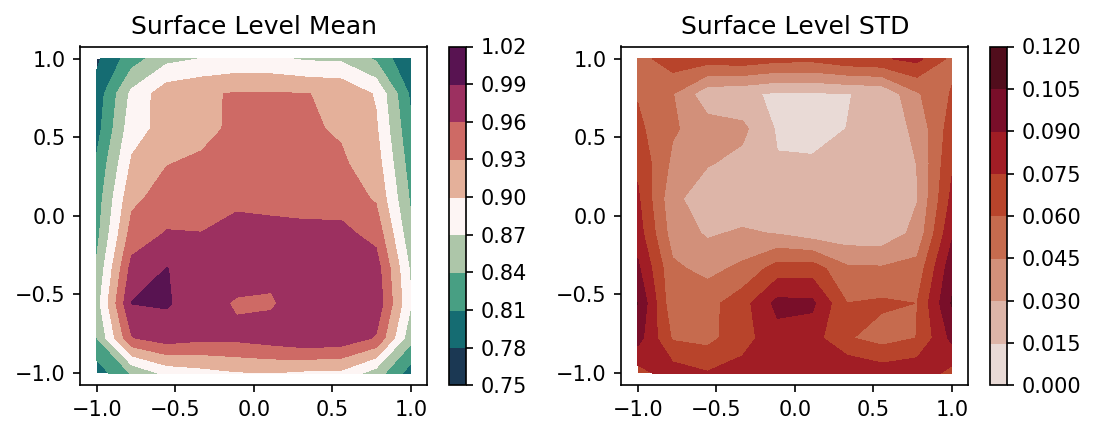

In [295]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(7.45, 3))
ax = fig.add_subplot(1, 2, 1)
pp = ax.contourf(xv,yv,results[:,:,0],cmap=cmo.curl)
ax.set_title('Surface Level Mean')
ax.axis('equal')
ax.set(xlim = (-1,1), ylim=(-1,1))
fig.colorbar(pp, ax=ax)
# fig.tight_layout()





ax = fig.add_subplot(1, 2, 2)
pp = ax.contourf(xv,yv,results[:,:,1],cmap=cmo.amp)
ax.set_title('Surface Level STD')
ax.axis('equal')
ax.set(xlim = (-1,1), ylim=(-1,1))
fig.colorbar(pp, ax=ax)
# fig.tight_layout()
fig.tight_layout()
# fig, axs = plt.subplots(1,2)
plt.savefig('surface_level_sensors.png')

plt.show()
# axs[1].set_title('mean water elevation')
# axs[1].contourf(xv,yv,results[:,:,0],cmap=cmo.curl)
# axs[1].colorbar()
# 
# axs[1]
# axs[1].contour(xv,yv,results[:,:,0], colors='k')

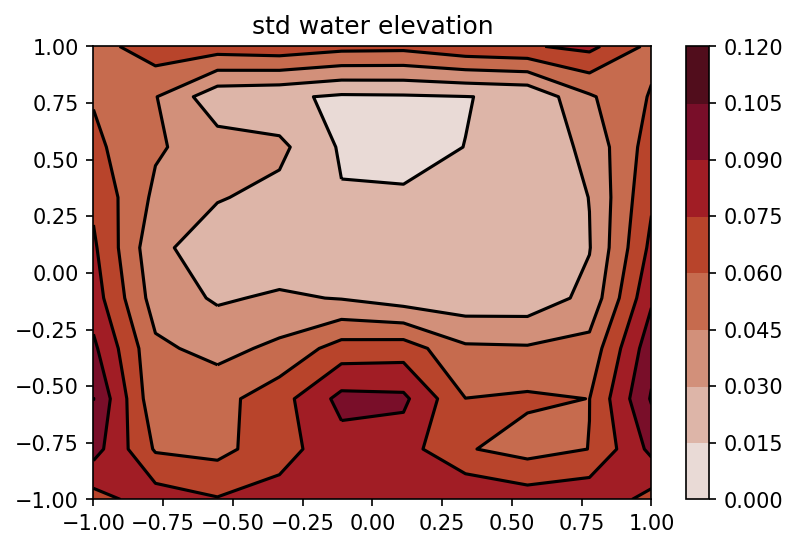

In [292]:
import matplotlib.pyplot as plt
import cmocean
import cmocean.cm as cmo


plt.title('std water elevation')
plt.contourf(xv,yv,results[:,:,1],cmap=cmo.amp)
plt.colorbar()
plt.contour(xv,yv,results[:,:,1], colors='k')

In [293]:
bound = pv.read('mandel_uniform_flow_out/mandel_uniform_flow_Bound.vtk')
plt.scatter3d(bound.points)

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatter3d'

(2591, 3)


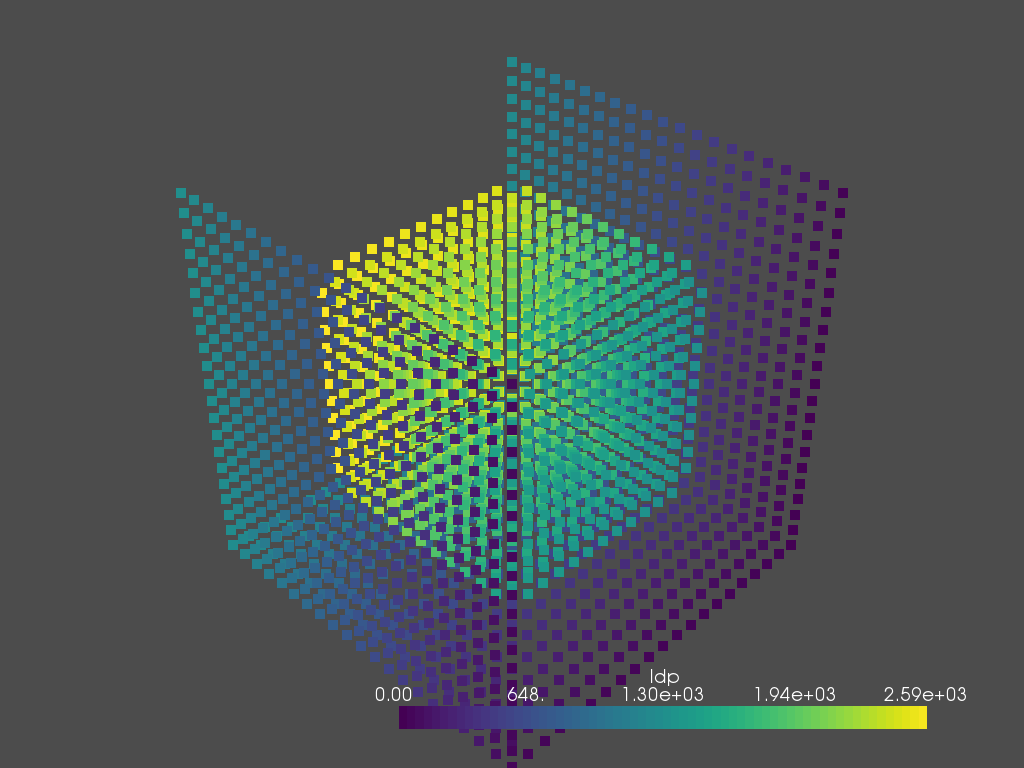

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [296]:
import pyvista as pv
# from pyvista import examples

# Volume rendering is not supported with Panel yet
pv.rcParams["use_panel"] = False

# Download a volumetric dataset
# vol = examples.download_knee_full()
cpos = [(-381.74, -46.02, 216.54), (74.8305, 89.2905, 100.0), (0.23, 0.072, 0.97)]
bound.set_active_scalars('Idp')
print(bound.points.shape)
bound.plot(point_size=10,cpos=[-1,1,1])

In [ ]:
i = 0
for line in header:
    print(str(i),' ',line)
    print(results.flatten()[i])
    i += 1